### Import necessary packages

In [1]:
from sklearn.pipeline import Pipeline 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector as selector
import mlflow
import mlflow.sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Data availability

In [5]:
import pandas as pd

path = "/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/han/database_data_availability_202312"
data_availability = pd.read_parquet(path)
data_availability

,product_id,engine_type,time,te_exh_cyl_out__0,te_exh_cyl_out__1,te_exh_cyl_out__2,te_exh_cyl_out__3,te_exh_cyl_out__4,te_exh_cyl_out__5,te_exh_cyl_out__6,pd_air_ic__0,pr_exh_turb_out__0,pr_exh_turb_out__1,pr_exh_turb_out__2,pr_exh_turb_out__3,te_air_ic_out__0,te_air_ic_out__1,te_air_ic_out__2,te_air_ic_out__3,te_seawater,te_air_comp_in_a__0,te_air_comp_in_a__1,te_air_comp_in_a__2,te_air_comp_in_a__3,te_air_comp_in_b__0,te_air_comp_in_b__1,te_air_comp_in_b__2,te_air_comp_in_b__3,fr_tc__0,fr_tc__1,fr_tc__2,fr_tc__3,pr_baro,pr_exh_rec
0,de4767cf9b170bdb62d76987d33bc213,S50ME-B9.3-TII,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
1,fc8768fb3263a5bd9a37d1a85cc01a79,G60ME-C9.2-TII,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
2,a07f5b60e89124d9257399ac30b68320,S90ME-C10.2-TII,0.0,0.138886,0.138886,0.138886,0.138886,0.138886,0.138886,0.138886,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,0.138886
3,c72f9286f1217fd43ecef539d5fef0d4,G60ME-C9.2-TII,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
4,bc2eb4dec6c67b8e87de9de65017953d,G60ME-C9.2-TII,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,62da8eab9763703fd1e0f6a6a6b79f14,G50ME-C9.6-HPSCR,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
439,066a4740216419c01d33d52e806f0fad,G50ME-B9.3-TII,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
440,e40e7d7a82f8e3d2a531cfaf86e321aa,G70ME-C10.5-LPSCR,0.0,0.138886,0.138886,0.138886,0.138886,0.138886,0.138886,100.000000,0.138886,100.0,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.138886,0.138886
441,4b8f543dd1e91b6aec1ab99906bb5be4,G90ME-C10.5-GI-EGRTC,0.0,3.090421,3.090421,3.090421,3.090421,3.090421,3.090421,3.090421,3.090421,100.0,100.0,100.0,100.0,3.090421,100.0,100.0,100.0,3.090421,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,3.090421,3.090421


In [4]:
pd.set_option('display.max_columns', None)
data_availability.describe()


,time,te_exh_cyl_out__0,te_exh_cyl_out__1,te_exh_cyl_out__2,te_exh_cyl_out__3,te_exh_cyl_out__4,te_exh_cyl_out__5,te_exh_cyl_out__6,pd_air_ic__0,pr_exh_turb_out__0,pr_exh_turb_out__1,pr_exh_turb_out__2,pr_exh_turb_out__3,te_air_ic_out__0,te_air_ic_out__1,te_air_ic_out__2,te_air_ic_out__3,te_seawater,te_air_comp_in_a__0,te_air_comp_in_a__1,te_air_comp_in_a__2,te_air_comp_in_a__3,te_air_comp_in_b__0,te_air_comp_in_b__1,te_air_comp_in_b__2,te_air_comp_in_b__3,fr_tc__0,fr_tc__1,fr_tc__2,fr_tc__3,pr_baro,pr_exh_rec
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.000000
mean,0.0,0.180868,0.144473,0.126663,0.135955,0.170027,0.092590,66.666667,0.092590,100.0,100.0,100.0,100.0,0.092590,100.0,100.0,100.0,33.379629,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.092590,0.092590
std,0.0,0.072716,0.009677,0.021171,0.005076,0.053938,0.080186,57.735027,0.080186,0.0,0.0,0.0,0.0,0.080186,0.0,0.0,0.0,57.694976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080186,0.080186
min,0.0,0.138886,0.138886,0.102216,0.130093,0.138886,0.000000,0.000000,0.000000,100.0,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.000000,0.000000
25%,0.0,0.138886,0.138886,0.120551,0.134490,0.138886,0.069443,50.000000,0.069443,100.0,100.0,100.0,100.0,0.069443,100.0,100.0,100.0,0.069443,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.069443,0.069443
50%,0.0,0.138886,0.138886,0.138886,0.138886,0.138886,0.138886,100.000000,0.138886,100.0,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.138886,0.138886
75%,0.0,0.201859,0.147267,0.138886,0.138886,0.185598,0.138886,100.000000,0.138886,100.0,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,50.069443,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.138886,0.138886
max,0.0,0.264833,0.155647,0.138886,0.138886,0.232310,0.138886,100.000000,0.138886,100.0,100.0,100.0,100.0,0.138886,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.138886,0.138886


### load dataset for machine learning models

In [2]:
path = "/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/han/dataframe_feb"
df = pd.read_parquet(path)
df.head()

,time,fr_eng,fr_eng_ecs,pr_cyl_max__6,pr_cyl_max__7,re_egb_area,re_egb_pos,te_exh_cyl_out__1,te_air_ic_out__0,pd_air_ic__0,pr_baro
0,2023-12-02 10:50:00,1.088333,1.090000,14990000.0,14770000.0,0.0,0.01,564.15,314.25,1500.0,1008.0
1,2023-12-02 10:51:00,1.096667,1.095000,14900000.0,14800000.0,0.0,0.01,564.15,314.25,1510.0,1008.0
2,2023-12-02 10:52:00,1.093333,1.090000,15030000.0,14850000.0,0.0,0.01,563.15,314.25,1500.0,1008.0
3,2023-12-02 10:53:00,1.086667,1.090000,15030000.0,14940000.0,0.0,0.01,563.15,314.25,1500.0,1008.0
4,2023-12-02 10:54:00,1.091667,1.091667,14950000.0,14950000.0,0.0,0.01,563.15,314.25,1500.0,1008.0


In [35]:
df.columns

Index(['time', 'fr_eng', 'fr_eng_ecs', 'pr_cyl_max__6', 'pr_cyl_max__7',
       're_egb_area', 're_egb_pos', 'te_exh_cyl_out__1', 'te_air_ic_out__0',
       'pd_air_ic__0', 'pr_baro'],
      dtype='object')

In [36]:
# Filter the DataFrame as the engine is running
filtered_df = df[(df['fr_eng'] > (10/60)) & (df['fr_eng_ecs'] > (10/60))]

# Choose a variable as y ('pr_baro') and other variables as X
df_sampled = filtered_df.dropna()
y = df_sampled['pr_baro']
X = df_sampled.drop(columns=['pr_baro', 'time'])


#Split train and test size with chronological order 8:2
train_size=int(len(df_sampled)*0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### xgboost for feature importance

In [31]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [13]:
feature_names = X.columns if hasattr(X, 'columns') else None
feature_names

Index(['fr_eng', 'fr_eng_ecs', 'pr_cyl_max__6', 'pr_cyl_max__7', 're_egb_area',
       're_egb_pos', 'te_exh_cyl_out__1', 'te_air_ic_out__0', 'pd_air_ic__0'],
      dtype='object')

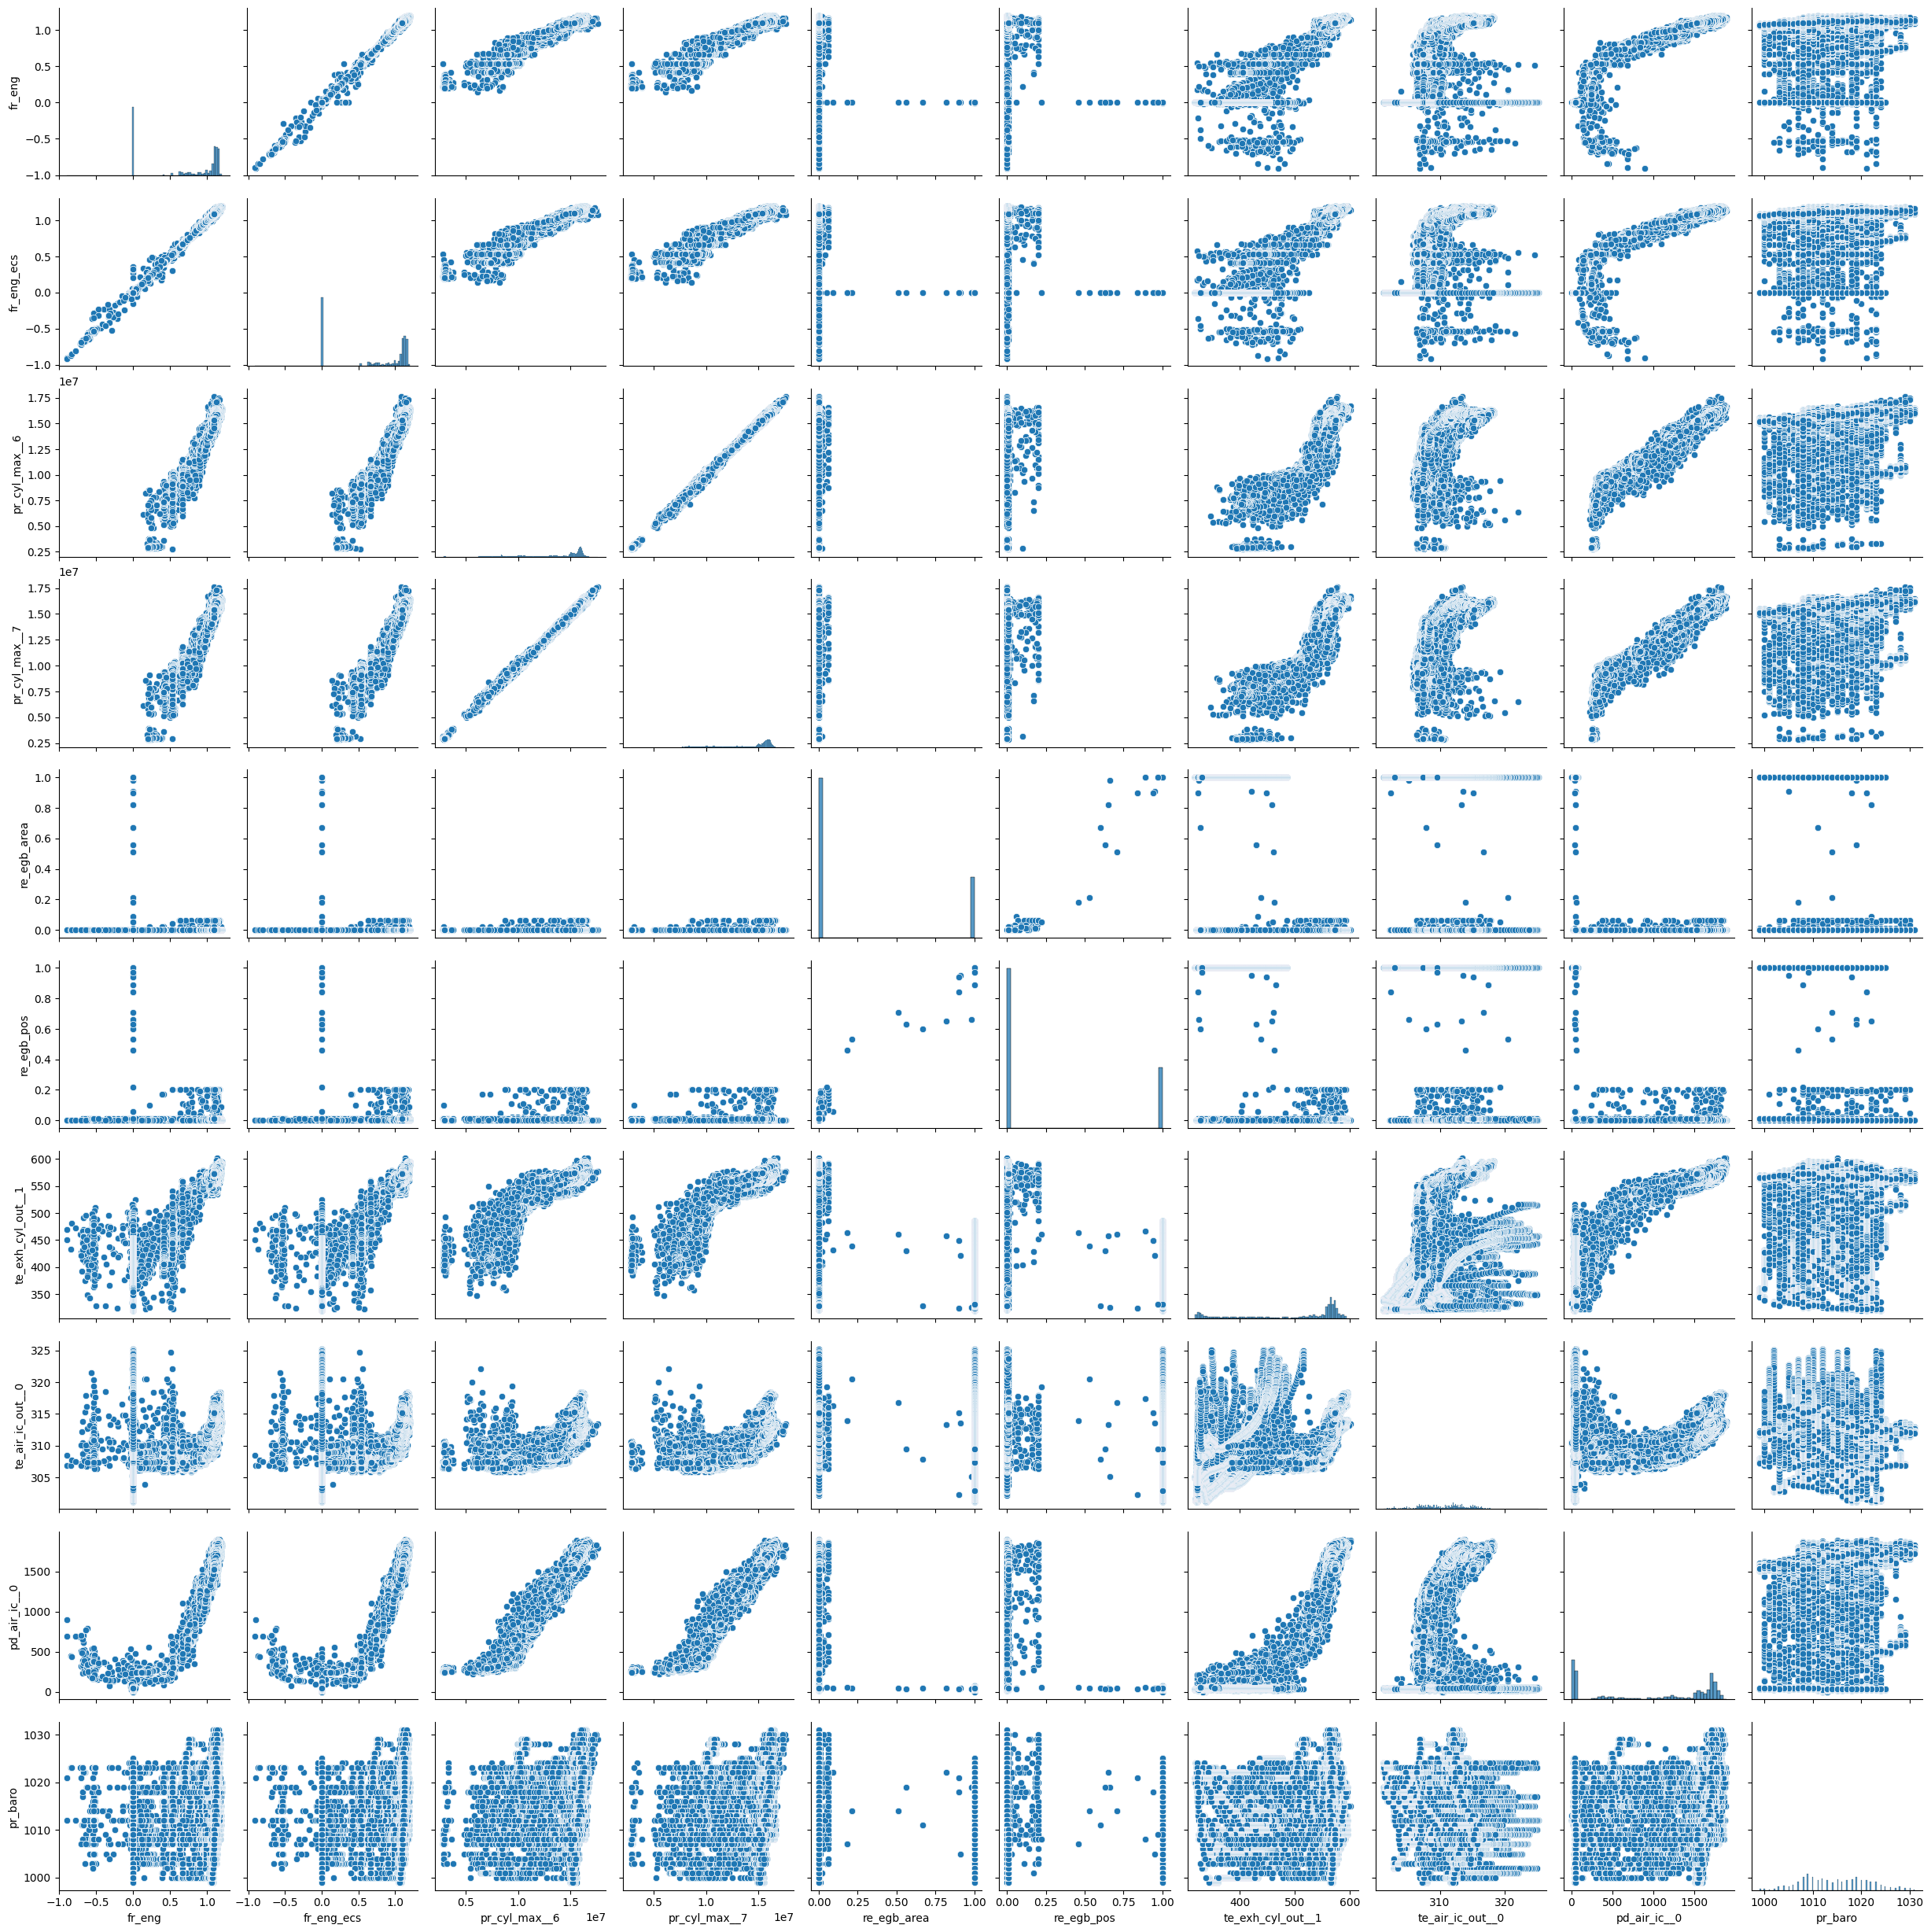

In [7]:
import seaborn as sns

sns.pairplot(df)

In [35]:
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Print explained variance ratio
pca_explained_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:")
print(pca_explained_ratio)

Explained variance ratio:
[7.14048595e-01 1.94469575e-01 5.16200615e-02 2.24667799e-02
 1.18292091e-02 3.28860795e-03 1.97246523e-03 1.83599640e-04
 1.21107263e-04]


In [6]:
import mlflow
import mlflow.sklearn
import sensor_imputation_thesis.shared.mlflow as _mlflow
mlflow.set_tracking_uri("http://localhost:5000")

### Pipeline 1: Linear Regression Model

In [5]:
Preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', KNNImputer(n_neighbors=2, weights="uniform")),
                          ('scaler', StandardScaler())]),
         selector(dtype_include='number'))], 
    remainder='drop')

Pipeline1 = Pipeline([ ('preprocessor', Preprocessor), 
                    ('Linear Regression', LinearRegression())])

In [6]:
Pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe1714e2c20>)])),
                ('Linear Regression', LinearRegression())])

In [7]:
y_pred=Pipeline1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 18.21420014820944
rmse: 4.26780976007711
r2: 0.5716331550344292


In [ ]:
input_example=X_test.iloc[:1]
with mlflow.start_run(run_name="Pipeline_1"):
    mlflow.log_param("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2",r2)
    mlflow.sklearn.log_model(Pipeline1, artifact_path="Pipeline_1", input_example=input_example)

### Pipeline 2: Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# Define the complete pipeline with Polynomial Regression
Pipeline2 = Pipeline([
    ('preprocessor', Preprocessor),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])

In [14]:
Pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f79240aa6e0>)])),
                ('polynomial_features', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])

In [15]:
y_pred=Pipeline2.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 10.38805961478701
rmse: 3.223051289506112
r2: 0.755676989300016


In [20]:
with mlflow.start_run(run_name="Pipeline_2: Polynomial Regression"):
    mlflow.log_param("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2",r2)
    mlflow.sklearn.log_model(Pipeline1, artifact_path="Pipeline_2", input_example=input_example)

🏃 View run Pipeline_2 at: http://localhost:5000/#/experiments/0/runs/09356cbc01e04b1da6728c840f41037c
🧪 View experiment at: http://localhost:5000/#/experiments/0


### Pipeline 3: Random Forests

In [12]:
from sklearn.ensemble import RandomForestRegressor

Preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler())]),
         selector(dtype_include='number'))
    ], 
    remainder='drop'
)

Pipeline3 = Pipeline([
    ('preprocessor', Preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=50))
])

In [13]:
Pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff77229ec20>)])),
                ('random_forest', RandomForestRegressor(n_estimators=50))])

In [14]:
y_pred=Pipeline3.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 0.028360370272899206
rmse: 0.16840537483376
r2: 0.999333012581557


/tmp/ipykernel_11378/3270691315.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['y_pred'], label='y_pred', shade=True)
/tmp/ipykernel_11378/3270691315.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['y_test'], label='y_test', shade=True)


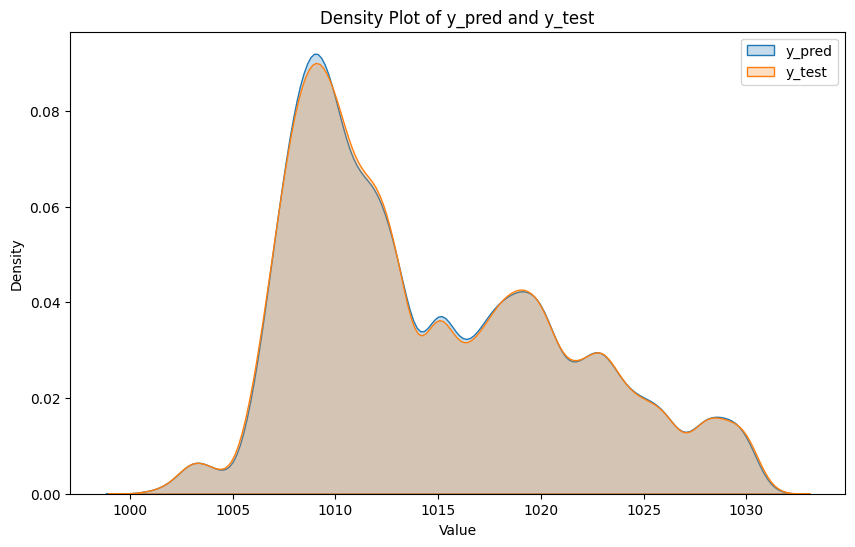

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
data = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

# Plot the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['y_pred'], label='y_pred', shade=True)
sns.kdeplot(data['y_test'], label='y_test', shade=True)
plt.title('Density Plot of y_pred and y_test')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [52]:
with mlflow.start_run(run_name="Pipeline_3: Random Forests"):
    mlflow.log_param("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2",r2)
    mlflow.sklearn.log_model(Pipeline1, artifact_path="Pipeline_3", input_example=input_example)

🏃 View run Pipeline_3: Random Forests at: http://localhost:5000/#/experiments/0/runs/0221d228bde1404d8513edcbb985676c
🧪 View experiment at: http://localhost:5000/#/experiments/0


In [ ]:
# grid search for random forest
Pipeline_grid = Pipeline([
    ('preprocessor', Preprocessor),
    ('random_forest', RandomForestRegressor())
])

# Define the parameter grid
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(Pipeline_grid, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)

### Pipeline 4: Gradient Boosting Machines

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

Pipeline4 = Pipeline([
    ('preprocessor', Preprocessor),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100))
])

In [22]:
Pipeline4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0de8fa9150>)])),
                ('gradient_boosting', GradientBoostingRegressor())])

In [23]:
y_pred=Pipeline4.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 7.228418354240885
rmse: 2.6885718056694867
r2: 0.8299904890425134


### Pipeline 5: Support Vector Machines

In [24]:
from sklearn.svm import SVR

Pipeline5 = Pipeline([
    ('preprocessor', Preprocessor),
    ('svm', SVR(kernel='rbf'))
])

In [ ]:
Pipeline5.fit(X_train, y_train)

In [ ]:
y_pred=Pipeline5.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 32.8587543605451
rmse: 5.732255608444646
r2: -0.6067087505539754


### Forward selection

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Assuming df is your DataFrame with 'time' and other 9 columns
# Drop 'time' column if it's not a feature
y = df_sampled['pr_baro']
X = df_sampled.drop(columns=['pr_baro', 'time'])

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply forward selection
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
sfs.fit(X, y)

# Get the selected features
selected_features = X.columns[sfs.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['fr_eng', 'pr_cyl_max__7', 're_egb_pos', 'te_air_ic_out__0'], dtype='object')


### Train random forest after forward selection

In [12]:
# mask out target column and define selected columns into x input
y = df_sampled['pr_baro']
X_selected = df_sampled[['fr_eng', 'pr_cyl_max__7', 're_egb_pos', 'te_air_ic_out__0']]

#Split train and test size with chronological order 8:2
train_size=int(len(df_sampled)*0.8)
X_selected_train, X_selected_test = X_selected.iloc[:train_size], X_selected.iloc[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
Pipeline6 = Pipeline([
    ('preprocessor', Preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=50))
])

In [14]:
Pipeline6.fit(X_selected_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f95544840a0>)])),
                ('random_forest', RandomForestRegressor(n_estimators=50))])

In [15]:
y_pred=Pipeline6.predict(X_selected_test)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 0.9844281718878739
rmse: 0.9921835374001495
r2: 0.9768466428098701


### SHAP explainer

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler())]),
         selector(dtype_include='number'))
    ], 
    remainder='drop'
)

Pipeline3 = Pipeline([
    ('preprocessor', Preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=50))
])

In [15]:
# create a SHAP explainer
import shap
rf_model = Pipeline3.named_steps['random_forest']

X_transformed = Pipeline3.named_steps['preprocessor'].transform(X_test)

In [8]:
lr_model = Pipeline1.named_steps['Linear Regression']
X_transformed = Pipeline1.named_steps['preprocessor'].transform(X_test)

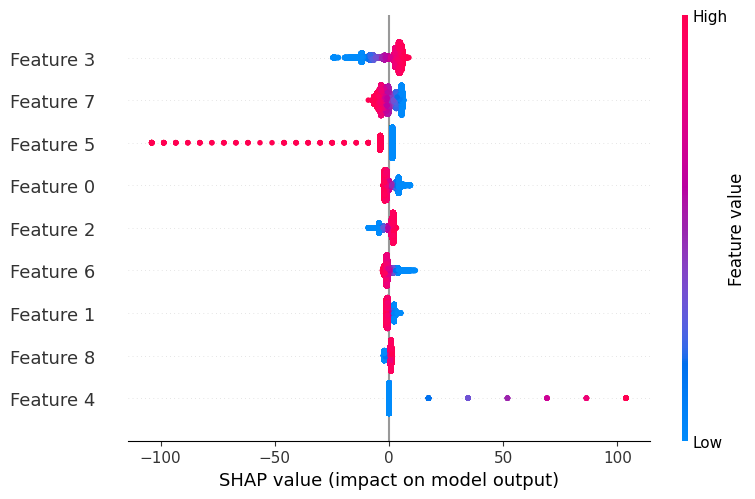

In [11]:
import shap

explainer = shap.Explainer(lr_model, X_transformed)
shap_values = explainer(X_transformed)

# Summary plot
shap.summary_plot(shap_values, X_transformed)

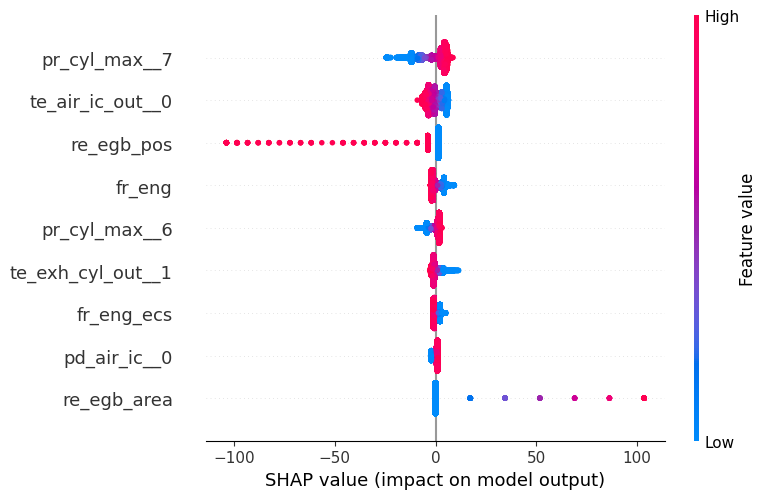

In [15]:
import shap

explainer = shap.Explainer(lr_model, X_transformed)
shap_values = explainer(X_transformed)


# Summary plot
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)